In [ ]:
#Gabriel Ceron gaboceron10@gmail.com

#Import

In [76]:

#Changing current di to desired to desired dir, not needed if working locally
%cd /content/drive/My Drive/Colab\ Notebooks/MLPR/PROJECT_v4
!ls

/content/drive/My Drive/Colab Notebooks/MLPR/PROJECT_v4
cross_val.py  gaussian_def.py  logistic_def.py		 pca.py        utils.py
dataBanknote  GMM_def.py       main_project.ipynb	 __pycache__
dcf.py	      gmm_log_def.py   main_project_noisy.ipynb  svm_k_def.py


In [77]:
#Run if you want to autoreload your personal modules on change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
# import sys
# sys.modules.clear()

import numpy
import numpy as np
import scipy
import matplotlib.pyplot as plt

import utils
import pca
import cross_val as cv
import dcf

#Models
import gaussian_def as gd
import logistic_def as log
import gmm_log_def as gmm
import svm_k_def as svm

In [79]:
dataset="banknote"
if dataset=="banknote":
  TR = numpy.loadtxt('dataBanknote/Train.txt',delimiter=',')
  TE = numpy.loadtxt('dataBanknote/Test.txt',delimiter=',')
if dataset=="banknoteH":
  TR = numpy.loadtxt('dataBanknote/TrainH.txt',delimiter=',')
  TE = numpy.loadtxt('dataBanknote/TestH.txt',delimiter=',')

np.random.seed(0)

np.random.shuffle(TR)
np.random.shuffle(TE)

DTR=TR[:,:-1] #675;4
LTR=TR[:,-1]
DTE=TE[:,:-1] #697;4
LTE=TE[:,-1]

#Descriptive Stats

In [ ]:
class0DTR = DTR[LTR == 0]
class1DTR = DTR[LTR == 1]
class0DTE = DTE[LTE == 0]
class1DTE = DTE[LTE == 1]

In [ ]:
#Training set balance
len(class0DTR)/len(LTR)

0.554074074074074

In [ ]:
#Test set balance
len(class0DTE)/len(LTE)

0.5566714490674318

In [ ]:
#Stats for  DTR
arr=DTR
# measures of central tendency
mean = np.mean(arr,axis=0)
median = np.median(arr,axis=0)
  
# measures of dispersion
min = np.amin(arr,axis=0)
max = np.amax(arr,axis=0)
range = np.ptp(arr,axis=0)
varience = np.var(arr,axis=0)
sd = np.std(arr,axis=0)
  
print("Mean =", mean)
print("Minimum =", min)
print("Maximum =", max)
print("StdDev =", sd)

Mean = [2.02371686 3.41415404 2.75707525 0.33073905]
Minimum = [ -5.74344305 -13.21829483  -4.99954252  -7.63158112]
Maximum = [ 9.3970844  15.26481737 19.77171845  4.87433413]
StdDev = [2.97634869 5.83804617 4.33338025 2.28973903]


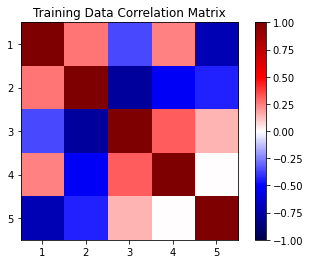

In [ ]:
corr_matrix=numpy.corrcoef(TR.T)
plt.imshow(corr_matrix, cmap='seismic',vmin=-1, vmax=1,extent=[0.5,5.5,5.5,0.5])
plt.colorbar()
plt.title("Training Data Correlation Matrix")
plt.show()

In [ ]:
myPca=pca.pca(4)
myPca.fit(DTR)
DTR_p3=myPca.transform(DTR)
DTE_p3=myPca.transform(DTE)

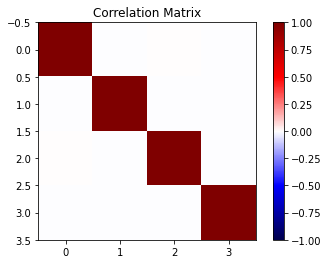

In [ ]:
corr_matrix=numpy.corrcoef(DTR_p3.T)
plt.imshow(corr_matrix, cmap='seismic',vmin=-1, vmax=1)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

In [ ]:
corr_matrix

array([[ 1.00000000e+00, -1.27283264e-16,  2.88552957e-17],
       [-1.27283264e-16,  1.00000000e+00, -2.89194204e-16],
       [ 2.88552957e-17, -2.89194204e-16,  1.00000000e+00]])

In [ ]:
#Stats for gaussianized data
myGauss=utils.Gauss_trans()
myGauss.fit(DTR)
DTR_g=myGauss.trans(DTR)
DTE_g=myGauss.trans(DTE)

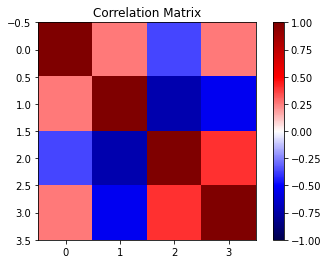

In [ ]:
corr_matrix=numpy.corrcoef(DTR_g.T)
plt.imshow(corr_matrix, cmap='seismic',vmin=-1, vmax=1)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

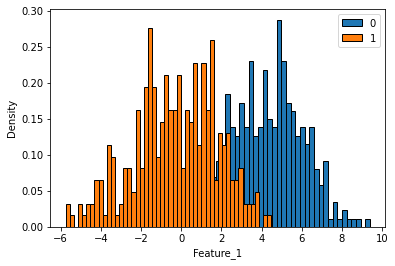

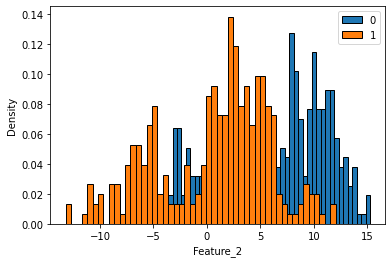

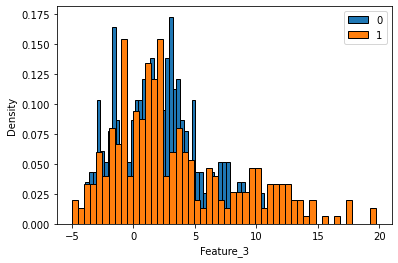

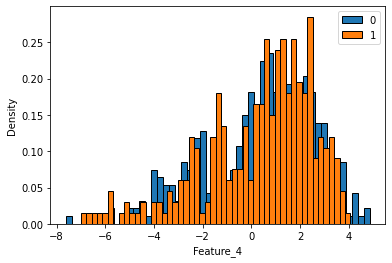

In [ ]:
utils.hist_class_all(DTR.T,LTR,b=50)

In [ ]:
myPca=pca.pca(3)
myPca.fit(DTR)
DTR_p3=myPca.transform(DTR)
DTE_p3=myPca.transform(DTE)

In [ ]:
utils.hist_class_all(DTR_p3.T,LTR,b=50)

NameError: ignored

In [ ]:
#Stats for gaussianized data
myGauss=utils.Gauss_trans()
myGauss.fit(DTR)
DTR_g=myGauss.trans(DTR)
DTE_g=myGauss.trans(DTE)

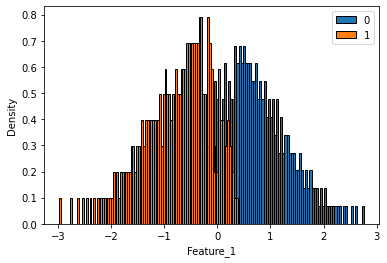

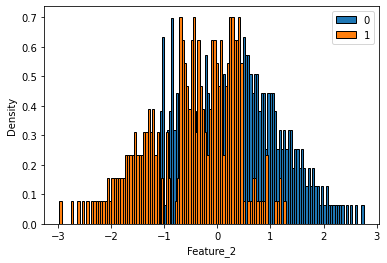

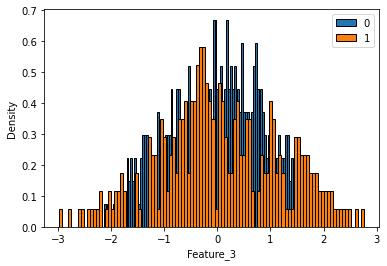

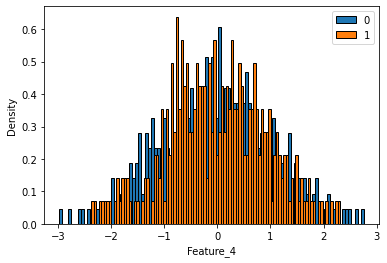

In [ ]:
utils.hist_class_all(DTR_g.T,LTR)

#Logistic Regression

In [12]:
#Try different values of lamda with cross validation and different preprocessing
model="logReg"
#Select a working point, iterate for different values of lambda
t=[0.5,1,1]

width=50

param_list=list(map(lambda x: 10**(x-(width/2)),list(range(width))))

minDCFn_v=[]
minDCFn_v_p3=[]
minDCFn_v_g=[]

n_params=len(param_list)
for i,param in enumerate(param_list):
  print("\r","Parameter: ",param, " ", i,"/",n_params)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t,params={"reg":param})
  minDCFn_v.append(minDCFn)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,prepro="pca3",K=10,t=t,params={"reg":param})
  minDCFn_v_p3.append(minDCFn)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,prepro="gauss",K=10,t=t,params={"reg":param})
  minDCFn_v_g.append(minDCFn)


 Parameter:  1e-25   0 / 50
 Parameter:  1e-24   1 / 50
 Parameter:  1e-23   2 / 50
 Parameter:  1e-22   3 / 50
 Parameter:  1e-21   4 / 50
 Parameter:  1e-20   5 / 50
 Parameter:  1e-19   6 / 50
 Parameter:  1e-18   7 / 50
 Parameter:  1e-17   8 / 50
 Parameter:  1e-16   9 / 50
 Parameter:  1e-15   10 / 50
 Parameter:  1e-14   11 / 50
 Parameter:  1e-13   12 / 50
 Parameter:  1e-12   13 / 50
 Parameter:  1e-11   14 / 50
 Parameter:  1e-10   15 / 50
 Parameter:  1e-09   16 / 50
 Parameter:  1e-08   17 / 50
 Parameter:  1e-07   18 / 50
 Parameter:  1e-06   19 / 50
 Parameter:  1e-05   20 / 50
 Parameter:  0.0001   21 / 50
 Parameter:  0.001   22 / 50
 Parameter:  0.01   23 / 50
 Parameter:  0.1   24 / 50
 Parameter:  1.0   25 / 50
 Parameter:  10.0   26 / 50
 Parameter:  100.0   27 / 50
 Parameter:  1000.0   28 / 50
 Parameter:  10000.0   29 / 50
 Parameter:  100000.0   30 / 50
 Parameter:  1000000.0   31 / 50
 Parameter:  10000000.0   32 / 50
 Parameter:  100000000.0   33 / 50
 Paramet

Text(0.5, 1.0, 'Logistic Regression')

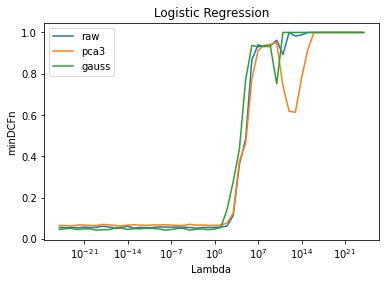

In [13]:
fig, ax = plt.subplots()
ax.plot(param_list,minDCFn_v,label="raw")
ax.plot(param_list,minDCFn_v_p3,label="pca3")
ax.plot(param_list,minDCFn_v_g,label="gauss")
ax.set_xscale("log")
ax.set(xlabel='Lambda', ylabel='minDCFn')
ax.legend()
ax.set_title("Logistic Regression")

In [ ]:
#Try different values of lamda with cross validation
model="logReg"
#Select a working point, iterate for different values of lambda
t=[0.5,1,1]

width=50

param_list=list(map(lambda x: 10**(x-(width/2)),list(range(width))))

minDCFn_v=[]
actDCFn_v=[]
n_params=len(param_list)
for i,param in enumerate(param_list):
  print("\r","Parameter: ",param, " ", i,"/",n_params)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t,params={"reg":param})
  minDCFn_v.append(minDCFn)
  actDCFn_v.append(actDCFn)

 Parameter:  1e-25   0 / 50
 Parameter:  1e-24   1 / 50
 Parameter:  1e-23   2 / 50
 Parameter:  1e-22   3 / 50


/content/drive/My Drive/Colab Notebooks/MLPR/PROJECT_v3/logistic_def.py:25: RuntimeWarning: overflow encountered in exp
  return (1+numpy.exp(-z))
/content/drive/My Drive/Colab Notebooks/MLPR/PROJECT_v3/logistic_def.py:14: RuntimeWarning: invalid value encountered in matmul
  first = numpy.log1p(a1).T @ y
/content/drive/My Drive/Colab Notebooks/MLPR/PROJECT_v3/logistic_def.py:15: RuntimeWarning: invalid value encountered in matmul
  second = numpy.log1p(a2).T @ (1 - y)


 Parameter:  1e-21   4 / 50
 Parameter:  1e-20   5 / 50
 Parameter:  1e-19   6 / 50
 Parameter:  1e-18   7 / 50
 Parameter:  1e-17   8 / 50
 Parameter:  1e-16   9 / 50
 Parameter:  1e-15   10 / 50
 Parameter:  1e-14   11 / 50
 Parameter:  1e-13   12 / 50
 Parameter:  1e-12   13 / 50
 Parameter:  1e-11   14 / 50
 Parameter:  1e-10   15 / 50
 Parameter:  1e-09   16 / 50
 Parameter:  1e-08   17 / 50
 Parameter:  1e-07   18 / 50
 Parameter:  1e-06   19 / 50
 Parameter:  1e-05   20 / 50
 Parameter:  0.0001   21 / 50
 Parameter:  0.001   22 / 50
 Parameter:  0.01   23 / 50
 Parameter:  0.1   24 / 50
 Parameter:  1.0   25 / 50
 Parameter:  10.0   26 / 50
 Parameter:  100.0   27 / 50
 Parameter:  1000.0   28 / 50
 Parameter:  10000.0   29 / 50
 Parameter:  100000.0   30 / 50
 Parameter:  1000000.0   31 / 50
 Parameter:  10000000.0   32 / 50
 Parameter:  100000000.0   33 / 50
 Parameter:  1000000000.0   34 / 50
 Parameter:  10000000000.0   35 / 50
 Parameter:  100000000000.0   36 / 50
 Paramete

Text(0.5, 1.0, 'Logistic Regression')

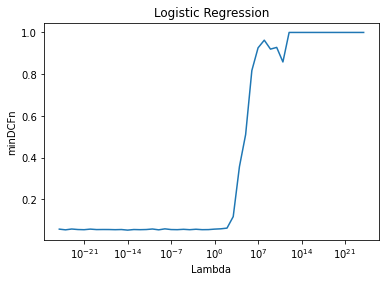

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,minDCFn_v)
ax.set_xscale("log")
ax.set(xlabel='Lambda', ylabel='minDCFn')
ax.set_title("Logistic Regression")

Text(0.5, 1.0, 'Logistic Regression')

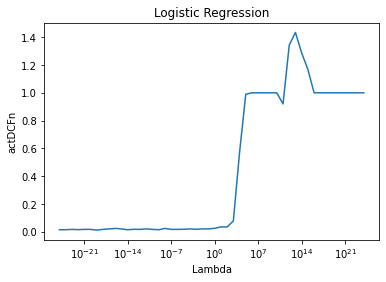

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,actDCFn_v)
ax.set_xscale("log")
ax.set(xlabel='Lambda', ylabel='actDCFn')
ax.set_title("Logistic Regression")

In [39]:
#Try applications
model="logReg"

t=[0.5,1,1]
pi_v=[0.5,0.9,0.1]

minDCFn_v_=[]
actDCFn_v=[]
minDCFn_v_g=[]
actDCFn_v_g=[]
minDCFn_v_p3=[]
actDCFn_v_p3=[]

for pi in pi_v:
  t=[pi,1,1]
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t,params={"reg":0})
  minDCFn_v.append(minDCFn)
  actDCFn_v.append(actDCFn)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,prepro="gauss",K=10,t=t,params={"reg":0})
  minDCFn_v_g.append(minDCFn)
  actDCFn_v_g.append(actDCFn)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,prepro="pca3",K=10,t=t,params={"reg":0})
  minDCFn_v_p3.append(minDCFn)
  actDCFn_v_p3.append(actDCFn)

#Print as format in report:
print(". RAW Gauss PCA3")
for i,pi in enumerate(pi_v):
  print("pi =",pi)
  print("minDCFn","%.4f" % minDCFn_v[i],"%.4f" % minDCFn_v_g[i], "%.4f" % minDCFn_v_p3[i])
  print("actDCFn","%.4f" %actDCFn_v[i],"%.4f" % actDCFn_v_g[i],"%.4f" % actDCFn_v_p3[i])

RAW Gauss PCA3
pi= 0.5
0.012 0.000 0.020
0.017 0.000 0.024
pi= 0.9
0.000 0.000 0.024
0.181 0.000 0.542
pi= 0.1
0.024 0.000 0.023
0.266 0.000 0.221


# Multivaraite Gaussian

In [69]:
# cv for different gaussian models

t=[0.5,1,1]
mvg_v=[]
mvg_a=[]

model="gaussFull"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t)
mvg_v.append(minDCFn)
mvg_a.append(actDCFn)

model="gaussTied"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t)
mvg_v.append(minDCFn)
mvg_a.append(actDCFn)

model="gaussNaive"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t)
mvg_v.append(minDCFn)
mvg_a.append(actDCFn)

print(mvg_v)
print(mvg_a)



[0.0, 0.053763440860215055, 0.33602150537634407]
[0.01084010840108401, 0.09534892112289818, 4.169841957133579]


In [71]:
# cv for pca 3

mvg_f=[]
mvg_t=[]
mvg_n=[]
mvg_f_g=[]
mvg_t_g=[]
mvg_n_g=[]
mvg_f_p3=[]
mvg_t_p3=[]
mvg_n_p3=[]

pi_v=[0.5,0.9,0.1]

for pi in pi_v:
  t=[pi,1,1]
  model="gaussFull"
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t)
  mvg_f.append(minDCFn)

  model="gaussTied"
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t)
  mvg_t.append(minDCFn)

  model="gaussNaive"
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t)
  mvg_n.append(minDCFn)

  model="gaussFull"
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="gauss",model=model,K=10,t=t)
  mvg_f_g.append(minDCFn)

  model="gaussTied"
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="gauss",model=model,K=10,t=t)
  mvg_t_g.append(minDCFn)

  model="gaussNaive"
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="gauss",model=model,K=10,t=t)
  mvg_n_g.append(minDCFn)

  model="gaussFull"
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="pca3",model=model,K=10,t=t)
  mvg_f_p3.append(minDCFn)

  model="gaussTied"
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="pca3",model=model,K=10,t=t)
  mvg_t_p3.append(minDCFn)

  model="gaussNaive"
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="pca3",model=model,K=10,t=t)
  mvg_n_p3.append(minDCFn)

for i,pi in enumerate(pi_v):
  print("pi =",pi)
  print("FullCov","%.4f" % mvg_f[i],"%.4f" % mvg_f_g[i], "%.4f" % mvg_f_p3[i])
  print("TiedCov","%.4f" %mvg_t[i],"%.4f" % mvg_t_g[i],"%.4f" % mvg_t_p3[i])
  print("NaiveCov","%.4f" %mvg_n[i],"%.4f" % mvg_n_g[i],"%.4f" % mvg_n_p3[i])

pi = 0.5
FullCov 0.0000 0.0000 0.0127
TiedCov 0.0201 0.0000 0.0222
NaiveCov 0.2592 0.1911 0.0566
pi = 0.9
FullCov 0.0000 0.0000 0.0108
TiedCov 0.0511 0.0000 0.0459
NaiveCov 0.3405 0.2555 0.0615
pi = 0.1
FullCov 0.0000 0.0000 0.0101
TiedCov 0.0235 0.0000 0.0368
NaiveCov 0.6740 0.5318 0.1074


#SVM

In [22]:
#Try different values of C, for rbf kernel g=10, different preprocessing
model="svm"
#Select a working point, iterate for different values of regulazation
t=[0.5,1,1]

#width centered on 1(10**0)
width=20

param_list=list(map(lambda x: 10**(x-(width/2)),list(range(width))))


minDCFn_v=[]
minDCFn_v_p3=[]
minDCFn_v_g=[]

n_params=len(param_list)
for i,param in enumerate(param_list):
  print("\r","Parameter: ",param, " ", i,"/",n_params)
  minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,model=model,t=t,params={"C_":param})
  minDCFn_v.append(minDCFn)
  minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,model=model,prepro="pca3",t=t,params={"C_":param})
  minDCFn_v_p3.append(minDCFn)
  minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,model=model,prepro="gauss",t=t,params={"C_":param})
  minDCFn_v_g.append(minDCFn)


 Parameter:  1e-10   0 / 20
 Parameter:  1e-09   1 / 20
 Parameter:  1e-08   2 / 20
 Parameter:  1e-07   3 / 20
 Parameter:  1e-06   4 / 20
 Parameter:  1e-05   5 / 20
 Parameter:  0.0001   6 / 20
 Parameter:  0.001   7 / 20
 Parameter:  0.01   8 / 20
 Parameter:  0.1   9 / 20
 Parameter:  1.0   10 / 20
 Parameter:  10.0   11 / 20
 Parameter:  100.0   12 / 20
 Parameter:  1000.0   13 / 20
 Parameter:  10000.0   14 / 20
 Parameter:  100000.0   15 / 20
 Parameter:  1000000.0   16 / 20
 Parameter:  10000000.0   17 / 20
 Parameter:  100000000.0   18 / 20
 Parameter:  1000000000.0   19 / 20


Text(0.5, 1.0, 'SVM RBF G=10')

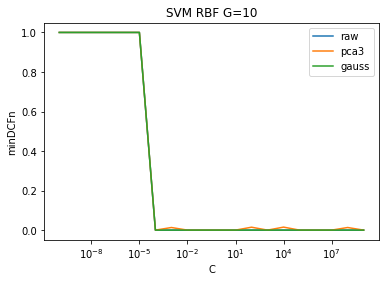

In [23]:
fig, ax = plt.subplots()
ax.plot(param_list,minDCFn_v,label="raw")
ax.plot(param_list,minDCFn_v_p3,label="pca3")
ax.plot(param_list,minDCFn_v_g,label="gauss")
ax.set_xscale("log")
ax.set(xlabel='C', ylabel='minDCFn')
ax.legend()
ax.set_title("SVM RBF G=10")

In [ ]:
#Try different values of C, for rbf kernel
model="svm"
#Select a working point, iterate for different values of regulazation
t=[0.5,1,1]

#width centered on 1(10**0)
width=20

param_list=list(map(lambda x: 10**(x-(width/2)),list(range(width))))

minDCFn_v=[]
actDCFn_v=[]
n_params=len(param_list)
for i,param in enumerate(param_list):
  print("\r","Parameter: ",param, " ", i,"/",n_params)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t,params={"C_":param})
  minDCFn_v.append(minDCFn)
  actDCFn_v.append(actDCFn)

 Parameter:  1e-10   0 / 20
 Parameter:  1e-09   1 / 20
 Parameter:  1e-08   2 / 20
 Parameter:  1e-07   3 / 20
 Parameter:  1e-06   4 / 20
 Parameter:  1e-05   5 / 20
 Parameter:  0.0001   6 / 20
 Parameter:  0.001   7 / 20
 Parameter:  0.01   8 / 20
 Parameter:  0.1   9 / 20
 Parameter:  1.0   10 / 20
 Parameter:  10.0   11 / 20
 Parameter:  100.0   12 / 20
 Parameter:  1000.0   13 / 20
 Parameter:  10000.0   14 / 20
 Parameter:  100000.0   15 / 20
 Parameter:  1000000.0   16 / 20
 Parameter:  10000000.0   17 / 20
 Parameter:  100000000.0   18 / 20
 Parameter:  1000000000.0   19 / 20


Text(0.5, 1.0, 'SVM')

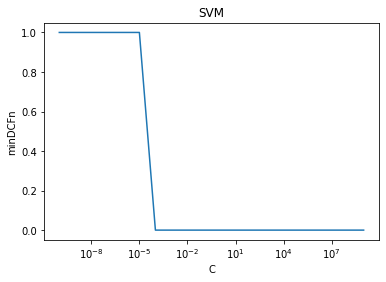

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,minDCFn_v)
ax.set_xscale("log")
ax.set(xlabel='C', ylabel='minDCFn')
ax.set_title("SVM")

Text(0.5, 1.0, 'SVM')

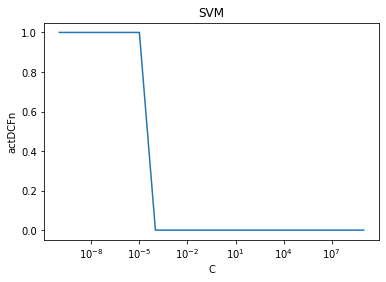

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,actDCFn_v)
ax.set_xscale("log")
ax.set(xlabel='C', ylabel='actDCFn')
ax.set_title("SVM")

In [24]:
#Try different values of gamma (rbf), C=10
model="svm"

t=[0.5,1,1]

#width centered on 1(10**0)
width=10

param_list=list(map(lambda x: 10**(x-(width/2)),list(range(width))))

minDCFn_v=[]
minDCFn_v_p3=[]
minDCFn_v_g=[]

n_params=len(param_list)
for i,param in enumerate(param_list):
  print("\r","Parameter: ",param, " ", i,"/",n_params)
  minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,model=model,t=t,params={"C_":10,"gamma_":param})
  minDCFn_v.append(minDCFn)
  minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,model=model,prepro="pca3",t=t,params={"C_":10,"gamma_":param})
  minDCFn_v_p3.append(minDCFn)
  minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,model=model,prepro="gauss",t=t,params={"C_":10,"gamma_":param})
  minDCFn_v_g.append(minDCFn)

 Parameter:  1e-05   0 / 10
 Parameter:  0.0001   1 / 10
 Parameter:  0.001   2 / 10
 Parameter:  0.01   3 / 10
 Parameter:  0.1   4 / 10
 Parameter:  1.0   5 / 10
 Parameter:  10.0   6 / 10
 Parameter:  100.0   7 / 10
 Parameter:  1000.0   8 / 10
 Parameter:  10000.0   9 / 10


Text(0.5, 1.0, 'SVM RBF C=10')

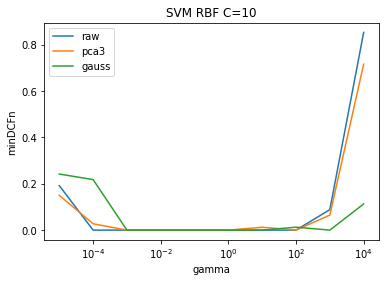

In [25]:
fig, ax = plt.subplots()
ax.plot(param_list,minDCFn_v,label="raw")
ax.plot(param_list,minDCFn_v_p3,label="pca3")
ax.plot(param_list,minDCFn_v_g,label="gauss")
ax.set_xscale("log")
ax.set(xlabel='gamma', ylabel='minDCFn')
ax.legend()
ax.set_title("SVM RBF C=10")

In [ ]:
#Try different values of gamma (rbf), C=10
model="svm"

t=[0.5,1,1]

#width centered on 1(10**0)
width=10

param_list=list(map(lambda x: 10**(x-(width/2)),list(range(width))))

minDCFn_v=[]
actDCFn_v=[]
n_params=len(param_list)
for i,param in enumerate(param_list):
  print("\r","Parameter: ",param, " ", i,"/",n_params)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t,params={"C_":10,"gamma_":param})
  minDCFn_v.append(minDCFn)
  actDCFn_v.append(actDCFn)

 Parameter:  1e-05   0 / 10
 Parameter:  0.0001   1 / 10
 Parameter:  0.001   2 / 10
 Parameter:  0.01   3 / 10
 Parameter:  0.1   4 / 10
 Parameter:  1.0   5 / 10
 Parameter:  10.0   6 / 10
 Parameter:  100.0   7 / 10
 Parameter:  1000.0   8 / 10
 Parameter:  10000.0   9 / 10


Text(0.5, 1.0, 'SVM C=10')

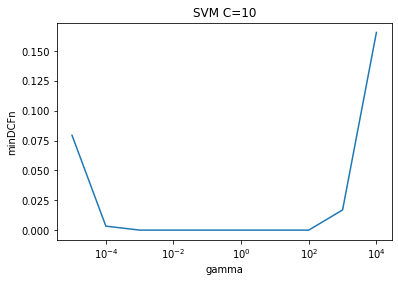

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,minDCFn_v)
ax.set_xscale("log")
ax.set(xlabel='gamma', ylabel='minDCFn')
ax.set_title("SVM C=10")

Text(0.5, 1.0, 'SVM C=10')

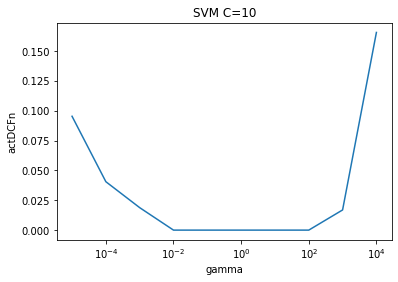

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,actDCFn_v)
ax.set_xscale("log")
ax.set(xlabel='gamma', ylabel='actDCFn')
ax.set_title("SVM C=10")

In [72]:
#Select gamma=1,C=10 cv for raw


model="svm"


t=[0.5,1,1]
pi_v=[0.5,0.9,0.1]

minDCFn_v_=[]
actDCFn_v=[]
minDCFn_v_g=[]
actDCFn_v_g=[]
minDCFn_v_p3=[]
actDCFn_v_p3=[]

for pi in pi_v:
  t=[pi,1,1]
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t,params={"C_":10,"gamma_":1})
  minDCFn_v.append(minDCFn)
  actDCFn_v.append(actDCFn)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,prepro="gauss",K=10,t=t,params={"C_":10,"gamma_":1})
  minDCFn_v_g.append(minDCFn)
  actDCFn_v_g.append(actDCFn)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,prepro="pca3",K=10,t=t,params={"C_":10,"gamma_":1})
  minDCFn_v_p3.append(minDCFn)
  actDCFn_v_p3.append(actDCFn)

#Print as format in report:
print(". RAW Gauss PCA3")
for i,pi in enumerate(pi_v):
  print("pi =",pi)
  print("minDCFn","%.4f" % minDCFn_v[i],"%.4f" % minDCFn_v_g[i], "%.4f" % minDCFn_v_p3[i])
  print("actDCFn","%.4f" %actDCFn_v[i],"%.4f" % actDCFn_v_g[i],"%.4f" % actDCFn_v_p3[i])

. RAW Gauss PCA3
pi = 0.5
minDCFn 0.0121 0.0000 0.0000
actDCFn 0.0000 0.0000 0.0000
pi = 0.9
minDCFn 0.0000 0.0000 0.0000
actDCFn 9.0000 8.7879 9.0000
pi = 0.1
minDCFn 0.0242 0.0000 0.0034
actDCFn 9.0000 8.8297 9.0000


In [73]:
#kernel linear,C=10 cv for raw

t=[0.5,1,1]

model="svm"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="gauss",model=model,K=10,t=t,params={"C_":10,"kernel_":"linear"})
print(minDCFn)
print(actDCFn)

0.0
0.024324324324324326


In [74]:
#kernel linear,C=10 cv for PCA 3

t=[0.5,1,1]

model="svm"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="pca3",model=model,K=10,t=t,params={"C_":10,"kernel_":"linear"})
print(minDCFn)
print(actDCFn)

0.03963700656707801
0.09395973154362416


In [75]:
#kernel linear,C=10 cv for gaussianization

model="svm"


t=[0.5,1,1]
pi_v=[0.5,0.9,0.1]

minDCFn_v_=[]
actDCFn_v=[]
minDCFn_v_g=[]
actDCFn_v_g=[]
minDCFn_v_p3=[]
actDCFn_v_p3=[]

for pi in pi_v:
  t=[pi,1,1]
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t,params={"C_":10,"kernel_":"linear"})
  minDCFn_v.append(minDCFn)
  actDCFn_v.append(actDCFn)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,prepro="gauss",K=10,t=t,params={"C_":10,"kernel_":"linear"})
  minDCFn_v_g.append(minDCFn)
  actDCFn_v_g.append(actDCFn)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,prepro="pca3",K=10,t=t,params={"C_":10,"kernel_":"linear"})
  minDCFn_v_p3.append(minDCFn)
  actDCFn_v_p3.append(actDCFn)

#Print as format in report:
print(". RAW Gauss PCA3")
for i,pi in enumerate(pi_v):
  print("pi =",pi)
  print("minDCFn","%.4f" % minDCFn_v[i],"%.4f" % minDCFn_v_g[i], "%.4f" % minDCFn_v_p3[i])
  print("actDCFn","%.4f" %actDCFn_v[i],"%.4f" % actDCFn_v_g[i],"%.4f" % actDCFn_v_p3[i])

. RAW Gauss PCA3
pi = 0.5
minDCFn 0.0121 0.0054 0.0364
actDCFn 0.0906 0.0243 0.0933
pi = 0.9
minDCFn 0.0000 0.0000 0.0514
actDCFn 3.7324 0.2416 3.8100
pi = 0.1
minDCFn 0.0242 0.0000 0.0610
actDCFn 0.3672 1.5726 0.3430


In [26]:
#Try different values of polynomial grade (d), C=10
model="svm"

t=[0.5,1,1]

#width centered on 1(10**0)
width=10

param_list=list(range(1,11))

minDCFn_v=[]
minDCFn_v_p3=[]
minDCFn_v_g=[]

n_params=len(param_list)
for i,param in enumerate(param_list):
  print("\r","Parameter: ",param, " ", i,"/",n_params)
  minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,model=model,t=t,params={"C_":10,"kernel_":"polynomial","d_":param,"b_":0})
  minDCFn_v.append(minDCFn)
  minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,model=model,prepro="pca3",t=t,params={"C_":10,"kernel_":"polynomial","d_":param,"b_":0})
  minDCFn_v_p3.append(minDCFn)
  minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,model=model,prepro="gauss",t=t,params={"C_":10,"kernel_":"polynomial","d_":param,"b_":0})
  minDCFn_v_g.append(minDCFn)

 Parameter:  1   0 / 10
 Parameter:  2   1 / 10
 Parameter:  3   2 / 10
 Parameter:  4   3 / 10
 Parameter:  5   4 / 10
 Parameter:  6   5 / 10
 Parameter:  7   6 / 10
 Parameter:  8   7 / 10
 Parameter:  9   8 / 10
 Parameter:  10   9 / 10


Text(0.5, 1.0, 'SVM Polynomial')

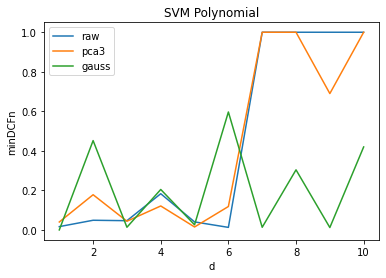

In [28]:
fig, ax = plt.subplots()
ax.plot(param_list,minDCFn_v,label="raw")
ax.plot(param_list,minDCFn_v_p3,label="pca3")
ax.plot(param_list,minDCFn_v_g,label="gauss")
ax.set(xlabel='d', ylabel='minDCFn')
ax.legend()
ax.set_title("SVM Polynomial")

In [ ]:
#Try different values of polynomial grade (d), C=10
model="svm"

t=[0.5,1,1]

#width centered on 1(10**0)
width=10

param_list=list(range(1,11))

minDCFn_v=[]
actDCFn_v=[]
n_params=len(param_list)
for i,param in enumerate(param_list):
  print("\r","Parameter: ",param, " ", i,"/",n_params)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t,params={"C_":10,"kernel_":"polynomial","d_":param,"b_":0})
  minDCFn_v.append(minDCFn)
  actDCFn_v.append(actDCFn)



 Parameter:  1   0 / 10
 Parameter:  2   1 / 10
 Parameter:  3   2 / 10
 Parameter:  4   3 / 10
 Parameter:  5   4 / 10
 Parameter:  6   5 / 10
 Parameter:  7   6 / 10
 Parameter:  8   7 / 10
 Parameter:  9   8 / 10
 Parameter:  10   9 / 10


Text(0.5, 1.0, 'SVM Polynomial C=10')

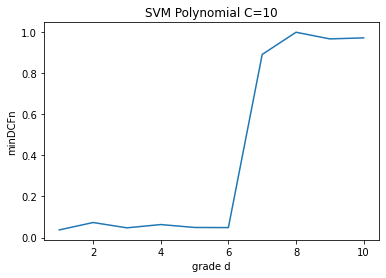

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,minDCFn_v)
#ax.set_xscale("log")
ax.set(xlabel='grade d', ylabel='minDCFn')
ax.set_title("SVM Polynomial C=10")

Text(0.5, 1.0, 'SVM linear C=10')

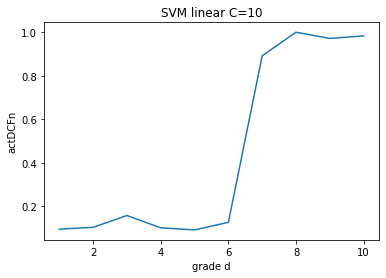

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,actDCFn_v)
#ax.set_xscale("log")
ax.set(xlabel='grade d', ylabel='actDCFn')
ax.set_title("SVM Polynomial C=10")

In [ ]:
#kernel polynomial, d=3,b=0,C=10 cv for raw

t=[0.5,1,1]

model="svm"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t,params={"C_":10,"kernel_":"polynomial","d_":2,"b_":0})
print(minDCFn)
print(actDCFn)

0.10452631863624481
0.14391187155748272


In [ ]:
#kernel poly,C=10 cv for PCA 3

t=[0.5,1,1]

model="svm"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="pca3",model=model,K=10,t=t,params={"C_":10,"kernel_":"linear"})
print(minDCFn)
print(actDCFn)

0.039033976687791294
0.08695652173913043


In [ ]:
#kernel poly,C=10 cv for gaussianization

t=[0.5,1,1]

model="svm"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="gauss",model=model,K=10,t=t,params={"C_":10,"kernel_":"linear"})
print(minDCFn)
print(actDCFn)

0.0
0.01891891891891892


#GMM

In [ ]:
gmmModel=gmm.GMM_2C(DTR,LTR,12,100)

In [ ]:
gmmModel.run()

[autoreload of gmm_log_def failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/content/drive/My Drive/Colab Notebooks/MLPR/PROJECT_v3/gmm_log_def.py", line 110
    "E Step
          ^
SyntaxError: EOL while scanning string literal
]
/content/drive/My Drive/Colab Notebooks/MLPR/PROJECT_v3/gmm_log_def.py:196: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _=ax.hist(DTR.T[f],color="b",bins=50,density=True)
/content/drive/My Drive/Colab Notebooks/MLPR/PROJECT_v3/gmm_log_def.py:198: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different len

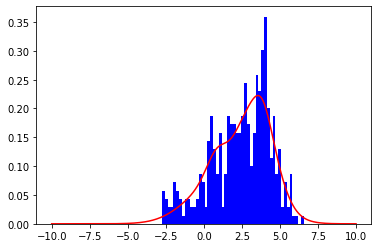

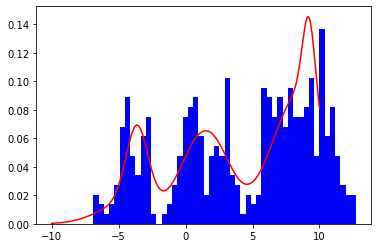

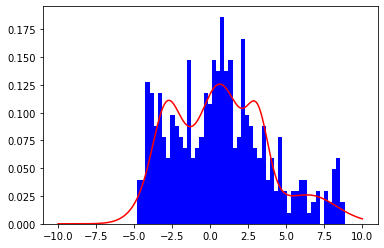

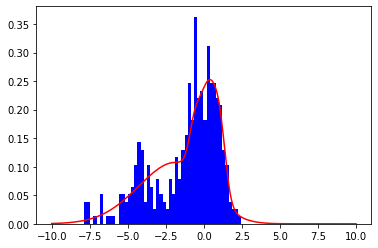

In [ ]:
gmm.showGraphEst(gmmModel.models_v[0],gmmModel.models_v[0].X)

In [ ]:
model="gmm"
#Select a working point, iterate for different values of regulazation
t=[0.5,1,1]

#Select N of components
n_comps=50

param_list=list(range(1,n_comps))

minDCFn_v=[]
actDCFn_v=[]
n_params=len(param_list)
for i,param in enumerate(param_list):
  print("\r","Parameter: ",param, " ", i,"/",n_params)
  minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,model=model,t=t,params={"n_comp":param,"iterations":60})
  minDCFn_v.append(minDCFn)
  actDCFn_v.append(actDCFn)

[autoreload of gmm_log_def failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/content/drive/My Drive/Colab Notebooks/MLPR/PROJECT_v3/gmm_log_def.py", line 112
    "E Step
          ^
SyntaxError: EOL while scanning string literal
]


 Parameter:  1   0 / 49
 Parameter:  2   1 / 49
 Parameter:  3   2 / 49
 Parameter:  4   3 / 49
 Parameter:  5   4 / 49
 Parameter:  6   5 / 49
 Parameter:  7   6 / 49
 Parameter:  8   7 / 49
 Parameter:  9   8 / 49
 Parameter:  10   9 / 49
 Parameter:  11   10 / 49
 Parameter:  12   11 / 49
 Parameter:  13   12 / 49
 Parameter:  14   13 / 49
 Parameter:  15   14 / 49
 Parameter:  16   15 / 49
 Parameter:  17   16 / 49
 Parameter:  18   17 / 49
 Parameter:  19   18 / 49
 Parameter:  20   19 / 49
 Parameter:  21   20 / 49
 Parameter:  22   21 / 49
 Parameter:  23   22 / 49
 Parameter:  24   23 / 49
 Parameter:  25   24 / 49
 Parameter:  26   25 / 49
 Parameter:  27   26 / 49
 Parameter:  28   27 / 49
 Parameter:  29   28 / 49
 Parameter:  30   29 / 49
 Parameter:  31   30 / 49
 Parameter:  32   31 / 49
 Parameter:  33   32 / 49
 Parameter:  34   33 / 49
 Parameter:  35   34 / 49
 Parameter:  36   35 / 49
 Parameter:  37   36 / 49
 Parameter:  38   37 / 49
 Parameter:  39   38 / 49


/content/drive/My Drive/Colab Notebooks/MLPR/PROJECT_v3/gmm_log_def.py:186: RuntimeWarning: divide by zero encountered in true_divide
  llr=np.log(predictions[0]/predictions[1])
/content/drive/My Drive/Colab Notebooks/MLPR/PROJECT_v3/gmm_log_def.py:186: RuntimeWarning: overflow encountered in true_divide
  llr=np.log(predictions[0]/predictions[1])


 Parameter:  40   39 / 49
 Parameter:  41   40 / 49
 Parameter:  42   41 / 49
 Parameter:  43   42 / 49
 Parameter:  44   43 / 49
 Parameter:  45   44 / 49
 Parameter:  46   45 / 49


In [ ]:
fig, ax = plt.subplots()
ax.plot(minDCFn_v)
#ax.set_xscale("log")
ax.set(xlabel='N Components', ylabel='minDCFn')
ax.set_title("GMM")

SyntaxError: ignored

In [ ]:
#gmm,N=10 single fold for raw

t=[0.5,1,1]

model="gmm"
minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,model=model,t=t,params={"n_comp":10,"iterations":60})
print(minDCFn)
print(actDCFn)

0.0
0.0


In [ ]:
#gmm,N=10 single fold for PCA 3

t=[0.5,1,1]

model="gmm"
minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,prepro="pca3",model=model,t=t,params={"n_comp":10,"iterations":60})
print(minDCFn)
print(actDCFn)

0.01282051282051282
0.02564102564102564


In [ ]:
#gmm,N=10 single fold for gaussianization

t=[0.5,1,1]

model="gmm"
minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,prepro="gauss",model=model,t=t,params={"n_comp":10,"iterations":60})
print(minDCFn)
print(actDCFn)

0.0
0.0


#Evaluation

##Logistic Regression

In [87]:
#Best hyperparameters
model="logReg"
t=[0.5,1,1]
minDCFn,_,_,actDCFn=cv.singleFold(DTR,LTR,DTE,LTE,prepro="gauss",model=model,t=t,params={"reg":0})
print(minDCFn)
print(actDCFn)

0.0
0.0


In [ ]:
#Try different values of lamda with cross validation
model="logReg"
#Select a working point, iterate for different values of lambda
t=[0.5,1,1]

width=50

param_list=list(map(lambda x: 10**(x-(width/2)),list(range(width))))

minDCFn_v=[]
actDCFn_v=[]
minDCFn_e_v=[]
actDCFn_e_v=[]
n_params=len(param_list)
for i,param in enumerate(param_list):
  print("\r","Parameter: ",param, " ", i,"/",n_params)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,t=t,params={"reg":param})
  minDCFn_v.append(minDCFn)
  actDCFn_v.append(actDCFn)
  minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,DTE,LTE,model=model,t=t,params={"reg":param})
  minDCFn_e_v.append(minDCFn)
  actDCFn_e_v.append(actDCFn)

 Parameter:  1e-25   0 / 50
 Parameter:  1e-24   1 / 50
 Parameter:  1e-23   2 / 50
 Parameter:  1e-22   3 / 50
 Parameter:  1e-21   4 / 50
 Parameter:  1e-20   5 / 50


/content/drive/My Drive/Colab Notebooks/MLPR/PROJECT_v3/logistic_def.py:25: RuntimeWarning: overflow encountered in exp
  return (1+numpy.exp(-z))
/content/drive/My Drive/Colab Notebooks/MLPR/PROJECT_v3/logistic_def.py:14: RuntimeWarning: invalid value encountered in matmul
  first = numpy.log1p(a1).T @ y
/content/drive/My Drive/Colab Notebooks/MLPR/PROJECT_v3/logistic_def.py:15: RuntimeWarning: invalid value encountered in matmul
  second = numpy.log1p(a2).T @ (1 - y)


 Parameter:  1e-19   6 / 50
 Parameter:  1e-18   7 / 50
 Parameter:  1e-17   8 / 50
 Parameter:  1e-16   9 / 50
 Parameter:  1e-15   10 / 50
 Parameter:  1e-14   11 / 50
 Parameter:  1e-13   12 / 50
 Parameter:  1e-12   13 / 50
 Parameter:  1e-11   14 / 50
 Parameter:  1e-10   15 / 50
 Parameter:  1e-09   16 / 50
 Parameter:  1e-08   17 / 50
 Parameter:  1e-07   18 / 50
 Parameter:  1e-06   19 / 50
 Parameter:  1e-05   20 / 50
 Parameter:  0.0001   21 / 50
 Parameter:  0.001   22 / 50
 Parameter:  0.01   23 / 50
 Parameter:  0.1   24 / 50
 Parameter:  1.0   25 / 50
 Parameter:  10.0   26 / 50
 Parameter:  100.0   27 / 50
 Parameter:  1000.0   28 / 50
 Parameter:  10000.0   29 / 50
 Parameter:  100000.0   30 / 50
 Parameter:  1000000.0   31 / 50
 Parameter:  10000000.0   32 / 50
 Parameter:  100000000.0   33 / 50
 Parameter:  1000000000.0   34 / 50
 Parameter:  10000000000.0   35 / 50
 Parameter:  100000000000.0   36 / 50
 Parameter:  1000000000000.0   37 / 50
 Parameter:  1000000000000

Text(0.5, 1.0, 'Logistic Regression')

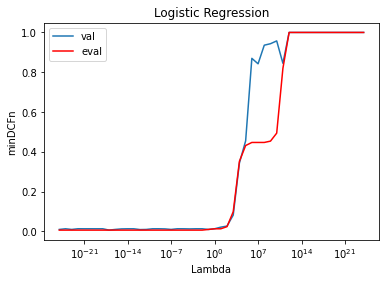

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,minDCFn_v,label="val")
ax.plot(param_list,minDCFn_e_v,"r",label="eval")
ax.legend()
ax.set_xscale("log")
ax.set(xlabel='Lambda', ylabel='minDCFn')
ax.set_title("Logistic Regression")

Text(0.5, 1.0, 'Logistic Regression')

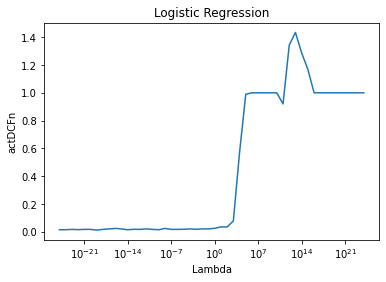

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,actDCFn_v)
ax.set_xscale("log")
ax.set(xlabel='Lambda', ylabel='actDCFn')
ax.set_title("Logistic Regression")

In [ ]:
#Try pca 3
model="logReg"
#Select a working point, iterate for different values of lambda
t=[0.5,1,1]

minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="pca3",model=model,K=10,t=t,params={"reg":0})

In [ ]:
#Try pca 2
model="logReg"
#Select a working point, iterate for different values of lambda
t=[0.5,1,1]

minDCFn,_,_,actDCFn= cv.cv(DTR_p2,LTR,model=model,K=10,t=t,params={"reg":0})

In [ ]:
#Try gaussianization
model="logReg"
#Select a working point, iterate for different values of lambda
t=[0.5,1,1]

minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="gauss",model=model,K=10,t=t,params={"reg":0})

In [ ]:
actDCFn

0.0

## Multivaraite Gaussian

In [86]:
#Best hyperparameters
model="gaussTied"
t=[0.5,1,1]
minDCFn,_,_,actDCFn=cv.singleFold(DTR,LTR,DTE,LTE,prepro="gauss",model=model,t=t)
print(minDCFn)
print(actDCFn)

0.0
0.03208556149732621


In [ ]:
# sf for different gaussian models

t=[0.5,1,1]
mvg_v=[]
mvg_a=[]

model="gaussFull"
minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,DTE,LTE,model=model,t=t)
mvg_v.append(minDCFn)
mvg_a.append(actDCFn)

model="gaussTied"
minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,DTE,LTE,model=model,t=t)
mvg_v.append(minDCFn)
mvg_a.append(actDCFn)

model="gaussNaive"
minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,DTE,LTE,model=model,t=t)
mvg_v.append(minDCFn)
mvg_a.append(actDCFn)

print(mvg_v)
print(mvg_a)

[0.0, 0.019933554817275746, 0.26155240108728484]
[0.034759358288770054, 0.04610300779931423, 0.2897560715618171]


In [ ]:
# sf for pca 3

t=[0.5,1,1]
mvg_v=[]
mvg_a=[]

model="gaussFull"
minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,DTE_p3,LTE,prepro="pca3",model=model,t=t)
mvg_v.append(minDCFn)
mvg_a.append(actDCFn)

model="gaussTied"
minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,DTE_p3,LTE,prepro="pca3",model=model,t=t)
mvg_v.append(minDCFn)
mvg_a.append(actDCFn)

model="gaussNaive"
minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,DTE_p3,LTE,prepro="pca3",model=model,t=t)
mvg_v.append(minDCFn)
mvg_a.append(actDCFn)

print(mvg_v)
print(mvg_a)

[0.0033222591362126247, 0.024712633467763426, 0.053475935828877004]
[0.034759358288770054, 0.058823529411764705, 0.058823529411764705]


In [ ]:
# sf for gaussianization


t=[0.5,1,1]
mvg_v=[]
mvg_a=[]

model="gaussFull"
minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,DTE,LTE,prepro="gauss",model=model,t=t)
mvg_v.append(minDCFn)
mvg_a.append(actDCFn)

model="gaussTied"
minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,DTE,LTE,prepro="gauss",model=model,t=t)
mvg_v.append(minDCFn)
mvg_a.append(actDCFn)

model="gaussNaive"
minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,DTE,LTE,prepro="gauss",model=model,t=t)
mvg_v.append(minDCFn)
mvg_a.append(actDCFn)

print(mvg_v)
print(mvg_a)

[0.0, 0.0, 0.18474070389255068]
[0.0, 0.03208556149732621, 0.20864498019080785]


##SVM

In [85]:
#Best hyperparameters
model="svm"
t=[0.5,1,1]
minDCFn,_,_,actDCFn=cv.singleFold(DTR,LTR,DTE,LTE,prepro="gauss",model=model,t=t,params={"kernel_":"rbf","C_":10,"gamma_":1})
print(minDCFn)
print(actDCFn)

0.0
0.0


In [ ]:
#Try different values of C, for rbf kernel
model="svm"
#Select a working point, iterate for different values of regulazation
t=[0.5,1,1]

#width centered on 1(10**0)
width=20

param_list=list(map(lambda x: 10**(x-(width/2)),list(range(width))))

minDCFn_v=[]
actDCFn_v=[]
minDCFn_e_v=[]
actDCFn_e_v=[]
n_params=len(param_list)
for i,param in enumerate(param_list):
  print("\r","Parameter: ",param, " ", i,"/",n_params)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,t=t,params={"C_":param})
  minDCFn_v.append(minDCFn)
  actDCFn_v.append(actDCFn)
  minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,DTE,LTE,model=model,t=t,params={"C_":param})
  minDCFn_e_v.append(minDCFn)
  actDCFn_e_v.append(actDCFn)

 Parameter:  1e-10   0 / 20
 Parameter:  1e-09   1 / 20
 Parameter:  1e-08   2 / 20
 Parameter:  1e-07   3 / 20
 Parameter:  1e-06   4 / 20
 Parameter:  1e-05   5 / 20
 Parameter:  0.0001   6 / 20
 Parameter:  0.001   7 / 20
 Parameter:  0.01   8 / 20
 Parameter:  0.1   9 / 20
 Parameter:  1.0   10 / 20
 Parameter:  10.0   11 / 20
 Parameter:  100.0   12 / 20
 Parameter:  1000.0   13 / 20
 Parameter:  10000.0   14 / 20
 Parameter:  100000.0   15 / 20
 Parameter:  1000000.0   16 / 20
 Parameter:  10000000.0   17 / 20
 Parameter:  100000000.0   18 / 20
 Parameter:  1000000000.0   19 / 20


Text(0.5, 1.0, 'SVM RBF G=10')

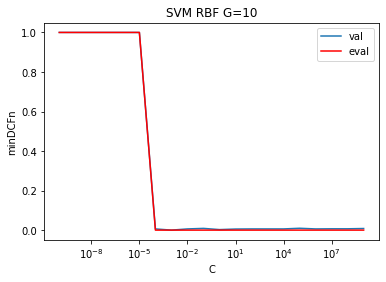

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,minDCFn_v,label="val")
ax.plot(param_list,minDCFn_e_v,"r",label="eval")
ax.legend()
ax.set_xscale("log")
ax.set(xlabel='C', ylabel='minDCFn')
ax.set_title("SVM RBF G=10")

Text(0.5, 1.0, 'SVM')

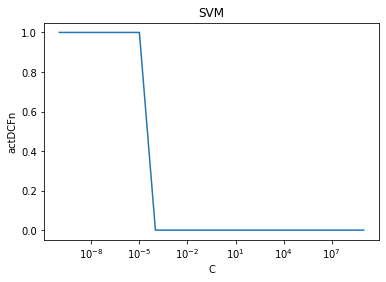

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,actDCFn_v)
ax.set_xscale("log")
ax.set(xlabel='C', ylabel='actDCFn')
ax.set_title("SVM")

In [ ]:
#Try different values of gamma (rbf), C=10
model="svm"

t=[0.5,1,1]

#width centered on 1(10**0)
width=10

param_list=list(map(lambda x: 10**(x-(width/2)),list(range(width))))

minDCFn_v=[]
actDCFn_v=[]
minDCFn_e_v=[]
actDCFn_e_v=[]
n_params=len(param_list)
for i,param in enumerate(param_list):
  print("\r","Parameter: ",param, " ", i,"/",n_params)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,t=t,params={"C_":10,"gamma_":param})
  minDCFn_v.append(minDCFn)
  actDCFn_v.append(actDCFn)
  minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,DTE,LTE,model=model,t=t,params={"C_":10,"gamma_":param})
  minDCFn_e_v.append(minDCFn)
  actDCFn_e_v.append(actDCFn)

 Parameter:  1e-05   0 / 10
 Parameter:  0.0001   1 / 10
 Parameter:  0.001   2 / 10
 Parameter:  0.01   3 / 10
 Parameter:  0.1   4 / 10
 Parameter:  1.0   5 / 10
 Parameter:  10.0   6 / 10
 Parameter:  100.0   7 / 10
 Parameter:  1000.0   8 / 10
 Parameter:  10000.0   9 / 10


Text(0.5, 1.0, 'SVM RBF')

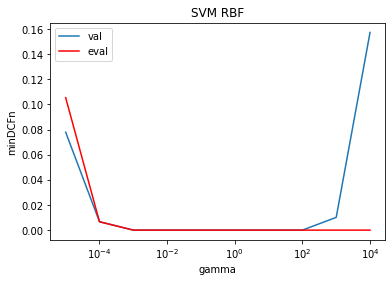

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,minDCFn_v,label="val")
ax.plot(param_list,minDCFn_e_v,"r",label="eval")
ax.legend()
ax.set_xscale("log")
ax.set(xlabel='gamma', ylabel='minDCFn')
ax.set_title("SVM RBF")

Text(0.5, 1.0, 'SVM C=10')

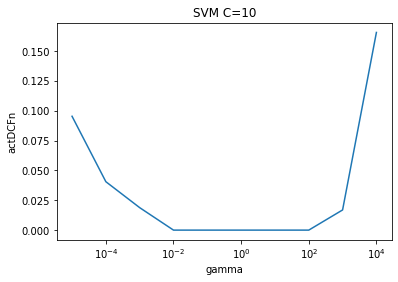

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,actDCFn_v)
ax.set_xscale("log")
ax.set(xlabel='gamma', ylabel='actDCFn')
ax.set_title("SVM C=10")

In [ ]:
#Select gamma=1,C=10 cv for raw

t=[0.5,1,1]

model="svm"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t,params={"C_":10,"gamma_":1})
print(minDCFn)
print(actDCFn)

0.0
0.0


In [ ]:
#Select gamma=1,C=10 cv for pca 3

t=[0.5,1,1]

model="svm"
minDCFn,_,_,actDCFn= cv.cv(DTR_p,LTR,model=model,K=10,t=t,params={"C_":10,"gamma_":1})

In [ ]:
actDCFn

0.002688172043010753

In [ ]:
#Select gamma=1,C=10 cv for gaussianization

t=[0.5,1,1]

model="svm"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="gauss",model=model,K=10,t=t,params={"C_":10,"gamma_":1})

In [ ]:
minDCFn

0.0

In [ ]:
#kernel linear,C=10 cv for raw

t=[0.5,1,1]

model="svm"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="gauss",model=model,K=10,t=t,params={"C_":10,"kernel_":"linear"})
print(minDCFn)
print(actDCFn)

0.0
0.0215633423180593


In [ ]:
#kernel linear,C=10 cv for PCA 3

t=[0.5,1,1]

model="svm"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="pca3",model=model,K=10,t=t,params={"C_":10,"kernel_":"linear"})
print(minDCFn)
print(actDCFn)

0.03890558850344373
0.09090909090909091


In [ ]:
#kernel linear,C=10 cv for gaussianization

t=[0.5,1,1]

model="svm"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="gauss",model=model,K=10,t=t,params={"C_":10,"kernel_":"linear"})
print(minDCFn)
print(actDCFn)

0.0
0.02702702702702703


In [ ]:
#Try different values of polynomial grade (d), C=10
model="svm"

t=[0.5,1,1]

#width centered on 1(10**0)
width=10

param_list=list(range(1,11))

minDCFn_v=[]
actDCFn_v=[]
n_params=len(param_list)
for i,param in enumerate(param_list):
  print("\r","Parameter: ",param, " ", i,"/",n_params)
  minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t,params={"C_":10,"kernel_":"polynomial","d_":param,"b_":0})
  minDCFn_v.append(minDCFn)
  actDCFn_v.append(actDCFn)

 Parameter:  1   0 / 10
 Parameter:  2   1 / 10
 Parameter:  3   2 / 10
 Parameter:  4   3 / 10
 Parameter:  5   4 / 10
 Parameter:  6   5 / 10
 Parameter:  7   6 / 10
 Parameter:  8   7 / 10
 Parameter:  9   8 / 10
 Parameter:  10   9 / 10


Text(0.5, 1.0, 'SVM Polynomial C=10')

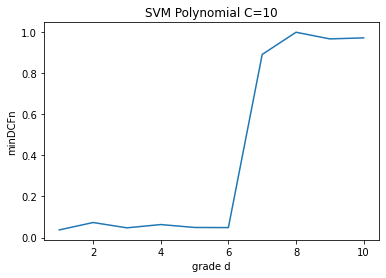

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,minDCFn_v)
#ax.set_xscale("log")
ax.set(xlabel='grade d', ylabel='minDCFn')
ax.set_title("SVM Polynomial C=10")

Text(0.5, 1.0, 'SVM linear C=10')

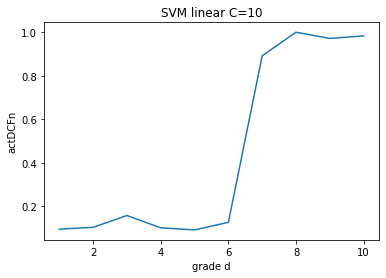

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,actDCFn_v)
#ax.set_xscale("log")
ax.set(xlabel='grade d', ylabel='actDCFn')
ax.set_title("SVM Polynomial C=10")

In [ ]:
#kernel polynomial, d=3,b=0,C=10 cv for raw

t=[0.5,1,1]

model="svm"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,model=model,K=10,t=t,params={"C_":10,"kernel_":"polynomial","d_":2,"b_":0})
print(minDCFn)
print(actDCFn)

0.10452631863624481
0.14391187155748272


In [ ]:
#kernel poly,C=10 cv for PCA 3

t=[0.5,1,1]

model="svm"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="pca3",model=model,K=10,t=t,params={"C_":10,"kernel_":"linear"})
print(minDCFn)
print(actDCFn)

0.039033976687791294
0.08695652173913043


In [ ]:
#kernel poly,C=10 cv for gaussianization

t=[0.5,1,1]

model="svm"
minDCFn,_,_,actDCFn= cv.cv(DTR,LTR,prepro="gauss",model=model,K=10,t=t,params={"C_":10,"kernel_":"linear"})
print(minDCFn)
print(actDCFn)

0.0
0.01891891891891892


##GMM

In [84]:
#Best hyperparameters
model="gmm"
t=[0.5,1,1]
minDCFn,_,_,actDCFn=cv.singleFold(DTR,LTR,DTE,LTE,prepro="gauss",model=model,t=t,params={"n_comp":7,"iterations":60})
print(minDCFn)
print(actDCFn)

gmm
0.0
0.0


In [ ]:
model="gmm"
#Select a working point, iterate for different values of regulazation
t=[0.5,1,1]

#Select N of components
n_comps=10

param_list=list(range(1,n_comps))

minDCFn_v=[]
actDCFn_v=[]
minDCFn_e_v=[]
actDCFn_e_v=[]
n_params=len(param_list)
for i,param in enumerate(param_list):
  print("\r","Parameter: ",param, " ", i,"/",n_params)
  minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,model=model,t=t,params={"n_comp":param,"iterations":60})
  minDCFn_v.append(minDCFn)
  actDCFn_v.append(actDCFn)
  minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,DTE,LTE,model=model,t=t,params={"n_comp":param,"iterations":60})
  minDCFn_e_v.append(minDCFn)
  actDCFn_e_v.append(actDCFn)

Text(0.5, 1.0, 'GMM')

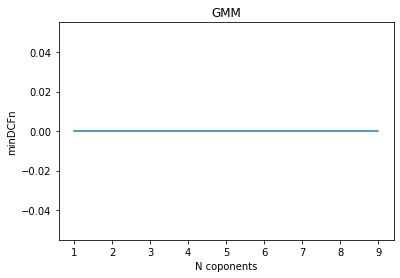

In [ ]:
fig, ax = plt.subplots()
ax.plot(param_list,minDCFn_v,label="val")
ax.plot(param_list,minDCFn_e_v,"r",label="eval")
ax.legend()
ax.set(xlabel='N coponents', ylabel='minDCFn')
ax.set_title("GMM")

In [ ]:
#gmm,N=10 single fold for raw

t=[0.5,1,1]

model="gmm"
minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,model=model,t=t,params={"n_comp":10,"iterations":60})
print(minDCFn)
print(actDCFn)

0.0
0.0


In [ ]:
#gmm,N=10 single fold for PCA 3

t=[0.5,1,1]

model="gmm"
minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,prepro="pca3",model=model,t=t,params={"n_comp":10,"iterations":60})
print(minDCFn)
print(actDCFn)

0.01282051282051282
0.02564102564102564


In [ ]:
#gmm,N=10 single fold for gaussianization

t=[0.5,1,1]

model="gmm"
minDCFn,_,_,actDCFn= cv.singleFold(DTR,LTR,prepro="gauss",model=model,t=t,params={"n_comp":10,"iterations":60})
print(minDCFn)
print(actDCFn)

0.0
0.0
